MLP / CNN 어떤걸로 할지 선택

오토인코더 써서 실습과 유사하게 하되, 모델의 구조는 변경 필요

1. feature extraction : Code vector 뽑아서 latent image 확인

2. reconstruction error 이용해서 novelty detection 해보기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
datax = np.load('/content/drive/MyDrive/MNIST.npy', allow_pickle=True)
datay = np.load('/content/drive/MyDrive/Label.npy', allow_pickle=True)

In [ ]:
datax_norm = datax/255
print('최대 : {}, 최소 : {}'.format(np.max(datax_norm), np.min(datax_norm)))

최대 : 1.0, 최소 : 0.0


**MLP Autoencoder**

In [ ]:
datax_reshape = datax_norm.reshape([60000, 28*28])
datax_reshape.shape

(60000, 784)

In [ ]:
# Model

input_dim = datax_reshape.shape[1]

input_shape = (input_dim,)
input_tensor = layers.Input(input_shape)

## Encoder
encoder1 = layers.Dense(700, activation='leaky_relu')(input_tensor)
encoder2 = layers.Dense(400, activation='leaky_relu')(encoder1)
encoder3 = layers.Dense(150, activation='leaky_relu')(encoder2)
encoder4 = layers.Dense(49, activation='leaky_relu', name='latent_layer')(encoder3)

latent_tensor = encoder4

## Decoder
decoder1 = layers.Dense(150, activation='leaky_relu')(latent_tensor)
decoder2 = layers.Dense(400, activation='leaky_relu')(decoder1)
decoder3 = layers.Dense(700, activation='leaky_relu')(decoder2)

# Outputs
reconstruction_output = layers.Dense(input_dim, activation='relu')(decoder3)

In [ ]:
ae = models.Model(input_tensor, reconstruction_output)
ae.compile(optimizer = 'AdamW', loss = 'mse')

In [ ]:
ae.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 700)            │       549,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 400)            │       280,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 150)            │        60,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ latent_layer (Dense)            │ (None, 49)             │         7,399 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 150)            │         7,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 400)            │        60,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 700)            │       280,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 784)            │       549,584 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,795,633 (6.85 MB)

 Trainable params: 1,795,633 (6.85 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#parameter
epoch=30
batch_size=200

# y에도 datax를 넣어줌 => 복원하는 것을 목표로 하는 network 이기 때문
ae.fit(datax_reshape, datax_reshape,
       batch_size = batch_size,
       epochs=epoch,
       verbose=2)

Epoch 1/30
300/300 - 4s - 14ms/step - loss: 0.0239
Epoch 2/30
300/300 - 2s - 5ms/step - loss: 0.0103
Epoch 3/30
300/300 - 1s - 5ms/step - loss: 0.0084
Epoch 4/30
300/300 - 1s - 4ms/step - loss: 0.0074
Epoch 5/30
300/300 - 1s - 4ms/step - loss: 0.0068
Epoch 6/30
300/300 - 1s - 5ms/step - loss: 0.0063
Epoch 7/30
300/300 - 2s - 5ms/step - loss: 0.0060
Epoch 8/30
300/300 - 1s - 3ms/step - loss: 0.0057
Epoch 9/30
300/300 - 1s - 5ms/step - loss: 0.0055
Epoch 10/30
300/300 - 1s - 4ms/step - loss: 0.0053
Epoch 11/30
300/300 - 1s - 4ms/step - loss: 0.0052
Epoch 12/30
300/300 - 2s - 5ms/step - loss: 0.0050
Epoch 13/30
300/300 - 2s - 8ms/step - loss: 0.0049
Epoch 14/30
300/300 - 2s - 8ms/step - loss: 0.0048
Epoch 15/30
300/300 - 1s - 4ms/step - loss: 0.0047
Epoch 16/30
300/300 - 1s - 3ms/step - loss: 0.0046
Epoch 17/30
300/300 - 1s - 4ms/step - loss: 0.0046
Epoch 18/30
300/300 - 1s - 4ms/step - loss: 0.0045
Epoch 19/30
300/300 - 1s - 4ms/step - loss: 0.0044
Epoch 20/30
300/300 - 1s - 4ms/step - l

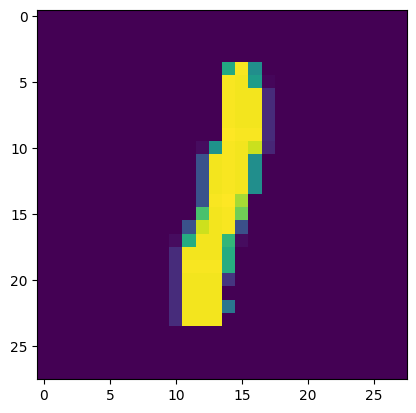

In [ ]:
# 원본 데이터 확인
plt.imshow(datax_reshape[231].reshape(28,28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


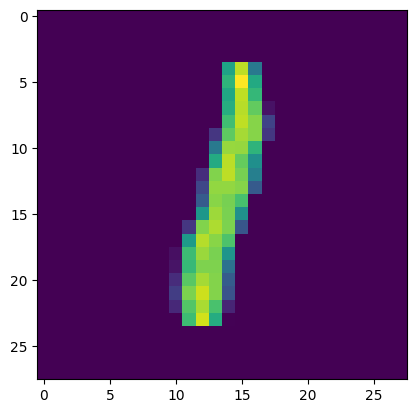

In [ ]:
# 데이터를 모델에 넣고 복원시킵니다.
decoded_img = ae.predict(datax_reshape[231].reshape(1,28*28))
decoded_img = decoded_img.reshape(28,28)

# 복원된 데이터 확인
plt.imshow(decoded_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
(1, 49)


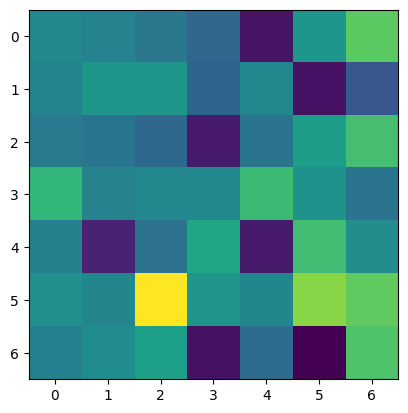

In [ ]:
intermediate_layer_model = models.Model(inputs=ae.input,
                                 outputs=ae.get_layer('latent_layer').output) #latent_layer 가져와서 output 출력
intermediate_output = intermediate_layer_model.predict(datax_reshape[231].reshape(1,28*28))

latent_vector = np.array(intermediate_output)
print(latent_vector.shape)
plt.imshow(latent_vector.reshape(7,7))

In [ ]:
# MAE 확인 (Reconstruction Error)
np.mean(np.abs(datax_reshape[700] - decoded_img.reshape(784,1)))

np.float64(0.20119217460257063)

0.21667106179964976
0.05832852944246014
0.30416385596333995


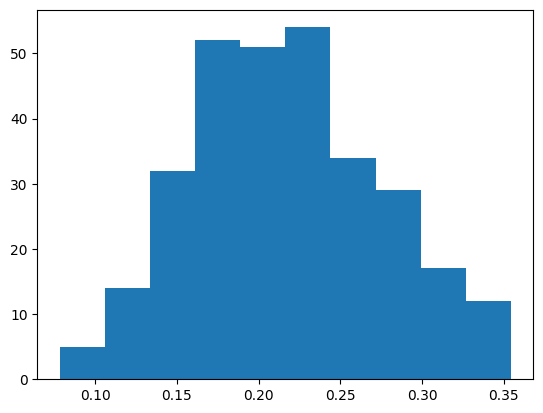

In [ ]:
# MAE 확인 (Reconstruction Error)
np.mean(np.abs(datax_reshape[0] - decoded_img.reshape(784,1)))

diffs = list()
for i in range(300):

  # 데이터를 모델에 넣고 복원시킵니다.
  decoded_img = ae.predict(datax_reshape[i].reshape(1,28*28), verbose=0)
  decoded_img = decoded_img.reshape(28,28)

  diffs.append(np.mean(np.abs(datax_reshape[i] - decoded_img.reshape(784,1))))

print(np.mean(diffs))
print(np.std(diffs))
print(np.mean(diffs)+np.std(diffs)*1.5)
plt.hist(diffs)
plt.show()

In [ ]:
random_vector = np.random.rand(784,1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


np.float64(0.3871534475189258)

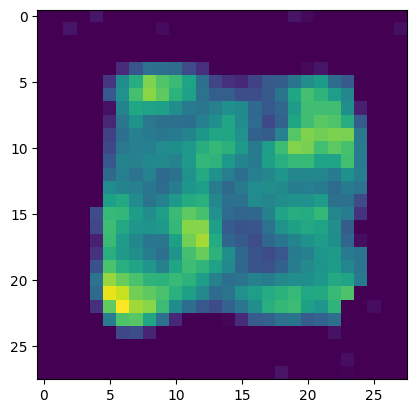

In [ ]:
random_vector = np.random.rand(784,1)

# 데이터를 모델에 넣고 복원시킵니다.
decoded_img = ae.predict(random_vector.reshape(1,28*28))
decoded_img = decoded_img.reshape(28,28)

# 복원된 데이터 확인
plt.imshow(decoded_img)

np.mean(np.abs(random_vector - decoded_img.reshape(784,1))) #학습 데이터에 대비 MAE가 높음 => outlier

In [ ]:
np.mean(np.abs(random_vector - decoded_img.reshape(784,1))) #학습 데이터에 대비 MAE가 높음 => outlier

np.float64(0.38093245513421103)

**CAE**
Convolutional Autoencoder

In [ ]:
datax_reshape = datax_norm.reshape((-1, 28, 28, 1))
print('최대 : {}, 최소 : {}'.format(np.max(datax_norm), np.min(datax_norm)))

In [ ]:
datax_reshape.shape

In [ ]:
## Input
input_shape = (28, 28, 1)
input_tensor = layers.Input(input_shape)

## Encoder
conv1 = layers.Conv2D(1, (3,3), padding='valid', activation='relu')(input_tensor)
conv2 = layers.Conv2D(1, (3,3), padding='valid', activation='relu')(conv1)
conv3 = layers.Conv2D(1, (3,3), padding='valid', activation='relu')(conv2)
pooling1 = layers.MaxPool2D(name='imlatent_layer')(conv3)

flatten1 = layers.Flatten()(pooling1)
dense1 = layers.Dense(100, activation='relu',name='latent_layer')(flatten1)

latent_tensor = dense1

## Decoding

dense2 = layers.Dense(11*11, activation='relu')(latent_tensor)
reshaped = layers.Reshape((11, 11, 1))(dense2)

upsample1 = layers.UpSampling2D()(reshaped)
tconv1 = layers.Conv2DTranspose(1, (3,3), padding='valid', activation='relu')(upsample1)
tconv2 = layers.Conv2DTranspose(1, (3,3), padding='valid', activation='relu')(tconv1)
tconv3 = layers.Conv2DTranspose(1, (3,3), padding='valid', activation='relu')(tconv2)

# Outputs
output_tensor = tconv3

In [ ]:
cae = models.Model(input_tensor, output_tensor)
cae.compile(optimizer = 'Adam', loss = 'mse')

In [ ]:
cae.summary()

In [ ]:
#parameter
epoch=10
batch_size=1024

cae.fit(datax_reshape, datax_reshape,
       batch_size = batch_size,
       epochs=epoch,
       verbose=2)

In [ ]:
# 원본 데이터 확인
plt.imshow(datax_reshape[10].reshape(28,28))

In [ ]:
# 데이터를 모델에 넣고 복원시킵니다.
decoded_img = cae.predict(datax_reshape[10].reshape(1,28, 28,1))
decoded_img = decoded_img.reshape(28,28)

# 복원된 데이터 확인
plt.imshow(decoded_img)

In [ ]:
np.mean(np.abs(datax_reshape[10].reshape(784,1) - decoded_img.reshape(784,1)))

In [ ]:
diffs = list()
for i in range(100):

  # 데이터를 모델에 넣고 복원시킵니다.
  decoded_img = cae.predict(datax_reshape[i].reshape(1,28, 28,1), verbose=0)
  decoded_img = decoded_img.reshape(28,28)

  diffs.append(np.mean(np.abs(datax_reshape[i].reshape(784,1) - decoded_img.reshape(784,1))))

print(np.mean(diffs))
print(np.std(diffs))
plt.hist(diffs)
plt.show()

In [ ]:
random_vector = np.random.rand(1,28,28,1)
# 데이터를 모델에 넣고 복원시킵니다.
decoded_img = cae.predict(random_vector)
decoded_img = decoded_img.reshape(28,28)

# 복원된 데이터 확인
plt.imshow(decoded_img)

# Reconstruction Error
np.mean(np.abs(random_vector.reshape(784,1) - decoded_img.reshape(784,1)))

In [ ]:
datax_reshape[10].shape
random_vector = datax_reshape[10] + np.random.normal(0, 0.1, size=[28,28,1])
plt.imshow(random_vector.reshape(28,28))

In [ ]:
# 데이터를 모델에 넣고 복원시킵니다.
decoded_img = cae.predict(random_vector.reshape(-1,28,28,1))
decoded_img = decoded_img.reshape(28,28)

# 복원된 데이터 확인
plt.imshow(decoded_img)

# Reconstruction Error
np.mean(np.abs(random_vector.reshape(784,1) - decoded_img.reshape(784,1)))

In [ ]:
intermediate_layer_model = models.Model(inputs=cae.input,
                                 outputs=cae.get_layer('imlatent_layer').output)
intermediate_output = intermediate_layer_model.predict(datax_reshape[10].reshape(1,28, 28,1))
latent_vector = np.array(intermediate_output)
plt.imshow(latent_vector.reshape(11,11))

In [ ]:
intermediate_layer_model = models.Model(inputs=cae.input,
                                 outputs=cae.get_layer('latent_layer').output)
intermediate_output = intermediate_layer_model.predict(datax_reshape[10].reshape(1,28, 28,1))
latent_vector = np.array(intermediate_output)
plt.imshow(latent_vector.reshape(10,10))